In [1]:
# ライブラリをインポート

# データ操作と数値計算のため
import pandas as pd
import numpy as np

# データ可視化のため
import matplotlib.pyplot as plt
import seaborn as sns

# 統計モデリングと計量経済分析のため
import statsmodels.api as sm
from statsmodels.iolib.summary2 import summary_col

# for ignore warning
import warnings
warnings.filterwarnings('ignore')

In [2]:
url = "https://www.fbc.keio.ac.jp/~tyabu/keiryo/spurious_data.csv"
df = pd.read_csv(url)
df.head()

,time,Y,X
0,1,-0.175971,-0.559048
1,2,2.111699,0.424893
2,3,2.392937,0.166186
3,4,2.821092,1.731295
4,5,2.565628,3.274143


In [4]:
# 変数の定義
df['dy'] = df['Y'] - df['Y'].shift(1)
df['dx'] = df['X'] - df['X'].shift(1)

## 16.1節の分析

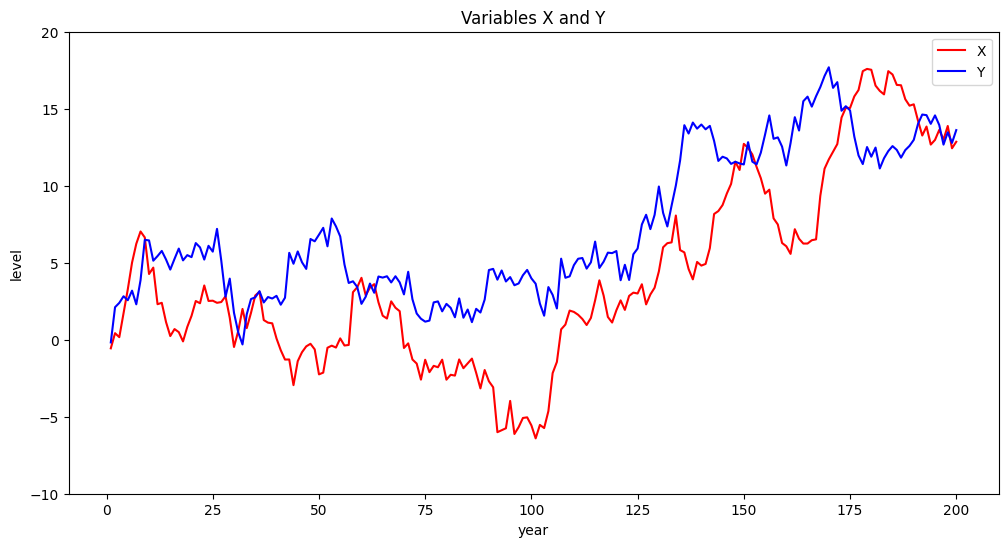

In [9]:
# 図16.1
plt.figure(figsize=(12, 6))
plt.plot(df['time'], df['X'], label='X', color='red')
plt.plot(df['time'], df['Y'], label='Y', color='blue')
plt.xlabel('year')
plt.ylabel('level')
plt.ylim(-10, 20)
plt.title('Variables X and Y')
plt.legend()
plt.show()


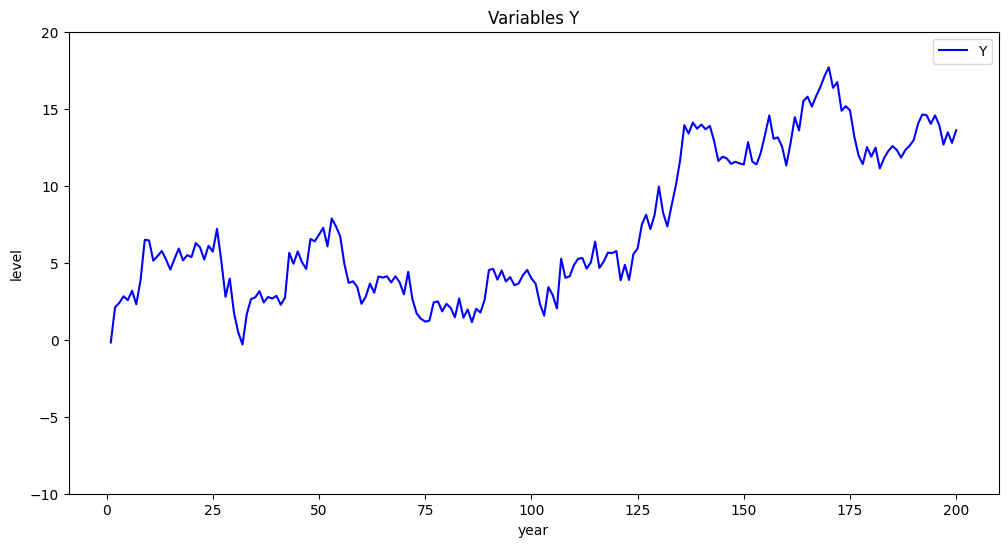

In [13]:
plt.figure(figsize=(12, 6))
plt.plot(df['time'], df['Y'], label='Y', color='blue')
plt.xlabel('year')
plt.ylabel('level')
plt.ylim(-10, 20)
plt.title('Variables Y')
plt.legend()
plt.show()

## 見せかけの回帰

In [14]:
# 定数項を追加
X = sm.add_constant(df['X'])

# モデルを適合
model_1 = sm.OLS(df['Y'], X).fit()

# 結果の要約を表示
print(model_1.summary())


                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.637
Model:                            OLS   Adj. R-squared:                  0.636
Method:                 Least Squares   F-statistic:                     348.0
Date:                Sat, 21 Sep 2024   Prob (F-statistic):           1.73e-45
Time:                        23:51:03   Log-Likelihood:                -491.07
No. Observations:                 200   AIC:                             986.1
Df Residuals:                     198   BIC:                             992.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.7675      0.240     19.829      0.0

### トレンド変数を追加する

In [15]:
# 定数項を追加
df['const'] = 1

# モデルを適合
model_2 = sm.OLS(df['Y'], df[['const', 'X', 'time']]).fit()

# 結果の要約を表示
print(model_2.summary())


                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.747
Model:                            OLS   Adj. R-squared:                  0.745
Method:                 Least Squares   F-statistic:                     291.5
Date:                Sat, 21 Sep 2024   Prob (F-statistic):           1.37e-59
Time:                        23:51:50   Log-Likelihood:                -454.90
No. Observations:                 200   AIC:                             915.8
Df Residuals:                     197   BIC:                             925.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.0021      0.360      5.563      0.0

### 階差の分析

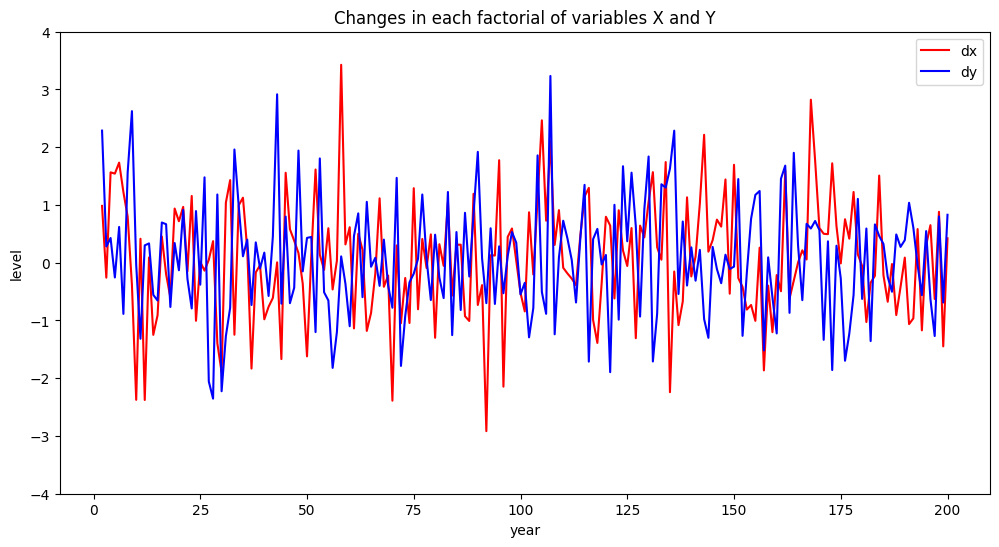

In [17]:
plt.figure(figsize=(12, 6))
plt.plot(df['time'], df['dx'], label='dx', color='red')
plt.plot(df['time'], df['dy'], label='dy', color='blue')
plt.xlabel('year')
plt.ylabel('level')
plt.ylim(-4, 4)
plt.title('Changes in each factorial of variables X and Y')
plt.legend()
plt.show()


In [18]:
# モデルを適合
model_3 = sm.OLS(df['dy'].dropna(), sm.add_constant(df['dx'].dropna())).fit()

# 結果の要約を表示
print(model_3.summary())

                            OLS Regression Results                            
Dep. Variable:                     dy   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.003
Method:                 Least Squares   F-statistic:                    0.3287
Date:                Sat, 21 Sep 2024   Prob (F-statistic):              0.567
Time:                        23:53:47   Log-Likelihood:                -284.77
No. Observations:                 199   AIC:                             573.5
Df Residuals:                     197   BIC:                             580.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0665      0.072      0.921      0.3